# Building a Personalized movie Recommendation System 


## Table of Contents

1. [Introduction](#introduction)<br>
1.1. [Business Question](#Business-Question)<br>
1.2. [Sub Questions](#Sub-Questions)
2. [Data Preprocessing](#data-preprocessing)<br>
2.1. [Explatory Data Analysis](#Explatory-Data-Analysis)<br>
3. [Model Training and Evaluation](#model-training-and-evaluation)<br>
3.1. [Manual KNN](#Manual-KNN)<br>
3.1.1. [Predicting a rating and evaluating the predicted rating](#Predicting-a-rating-and-evaluating-the-predicted-rating)<br>
3.1.2. [Recommending movies based on the user similarites](#Recommending-movies-based-on-the-user-similarites)<br>
3.1.3. [Recommending movies based on the item similarites](#Recommending-movies-based-on-the-item-similarites)<br>
3.2. [KNN With Surprise Package](#KNN-With-Surprise-Package)<br>
3.2.1. [Hyperparameter tuning for user-user similarity](#Hyperparameter-tuning-for-user-user-similarity)<br>
3.2.1.1. [Recommending movies with Surprise package for user-user similarity](#Recommending-movies-with-Surprise-package-for-user-user-similarity)<br>
3.2.1.2. [Computing item-item similarity with Surprise with KNN](#Computing-item-item-similarity-with-Surprise-with-KNN)<br>
3.3. [Manual-SVD](#Manual-SVD)<br>
3.3.1. [Recommending  with SVD based on the user similarites](#Recommending-with-SVD-based-on-the-user-similarites)<br>
3.3.2. [Predicting the RMSE with SVD](#Predicting-the-RMSE-with-SVD)<br>
3.3.2.1. [Recommending movies with Surprise package for item-item similarity](#Recommending-movies-with-Surprise-package-for-item-item-similarity)<br>
3.4. [Recommendation system using SVD from Suprise package](#Recommendation-system-using-SVD-from-Suprise-package)<br>
3.4.1. [Hyperparameter tuning for user-user similarity with SVD](#Hyperparameter-tuning-for-user-user-similarity-with-SVD)<br>
3.4.1.1. [Recommending  with SVD based on the user similarites using suprise package](#Recommending-with-SVD-based-on-the-user-similarites-using-suprise-package)<br>
3.4.2. [Hyperparameter tuning for user-user similarity with SVD from suprise package](#Hyperparameter-tuning-for-user-user-similarity-with-SVD-from-suprise-package)<br>
3.4.2.1. [Recommending  with SVD based on the item similarites using suprise package](#Recommending-with-SVD-based-on-the-user-similarites-using-suprise-package)<br>
3.4.2.2. [Hyperparameter tuning for item-item similarity with SVD](#Hyperparameter-tuning-for-item-item-similarity-with-SVD)<br>
3.4.2.3. [Recommending movies with Surprise package for item-item similarity](#Recommending-movies-with-Surprise-package-for-item-item-similarity)<br>
## [Introduction](#introduction)

In this project, we aim to build a recommendation system for Netflix using customer ratings to provide personalized movie recommendations and improve user engagement. To achieve this, we will use the Netflix Prize dataset, which contains over 100 million ratings from 480,000 randomly-chosen, anonymous Netflix customers.
## [Business Question](#Business-Question)

How can we use user ratings to develop a personalized movie recommendation system and recommend movies to the user?

## [Sub Questions](#Sub-Questions)

What is the distribution of ratings among the available movies?

what is the distribution of ratings among the available users?

Can we identify patterns in the ratings?

How can we use KNN and SVD algorithms to build personalized recommendation systems for each user based on their past ratings?

What is the distribution of number of ratings per user and movie?

How can we use the trained model to generate personalized movie recommendations for each user?

How can we improve the accuracy of the predictions, and can we incorporate additional data?

What models can we use for building a recommendation system, and how can we evaluate their performance?


# Importing the libraries

In [1]:
# Importing the required libraries
import pandas as pd 
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.linalg import svd
from scipy.sparse.linalg import svds
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

import gc 


# Loading, Cleaning and Merging the files

In [2]:
# # Get a list of all the files in the folder
# filenames= os.listdir('training_set')
# # open new file to write to
# new_file = open('training.txt', 'w')
 
# # write header to the new file
# new_file.write('userid,CustomerID,Rating,Date\n') 
# # loop through the files
# for filename in filenames:
#     # Get the full path to the file
#     file_path = os.path.join('training_set', filename)
#     # open the current file
#     with open(file_path, 'r') as f:
#         # read the first line
#         line = f.readline()
#         # check if the line starts with a number (the userid)
#         if line[0].isdigit():
#             # write the userid to the new file
#             userid = line.split(':')
#             movie= userid[0]
#             # read the rest of the lines
#             lines = f.readlines()
#             # loop through the lines
#             for line in lines:
#                 # write the CustomerID, Rating and Date to the new file
#                 customerID, rating, date = line.split(',')
#                 new_file.write(f'{movie},{customerID},{rating},{date}\n')
 
# # close the new file
# new_file.close()

In [2]:
df_training=pd.read_csv("training.txt")

In [23]:
import warnings

# Read the text file and store the data in a DataFrame
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_titles = pd.read_csv("movie_titles.txt", sep=',', header=None, names=['movieid', 'YearOfRelease', 'Title',"secondtitle","thirdtitle","fourthtitle"], encoding='iso-8859-1', error_bad_lines=False)

# Replace commas with spaces in the Title column
df_titles['Title'] = df_titles['Title'].str.replace(',', ' ')

# Convert YearOfRelease to datetime
df_titles['YearOfRelease'] = pd.to_datetime(df_titles['YearOfRelease'], format='%Y', errors='coerce')

# Print the first few rows of the DataFrame
print(df_titles.head())


   movieid YearOfRelease                         Title secondtitle thirdtitle  \
0        1    2003-01-01               Dinosaur Planet         NaN        NaN   
1        2    2004-01-01    Isle of Man TT 2004 Review         NaN        NaN   
2        3    1997-01-01                     Character         NaN        NaN   
3        4    1994-01-01  Paula Abdul's Get Up & Dance         NaN        NaN   
4        5    2004-01-01      The Rise and Fall of ECW         NaN        NaN   

  fourthtitle  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [24]:
df_titles=df_titles.fillna("")
df_titles['Title'] = df_titles['Title'].str.cat([df_titles['secondtitle'], df_titles['thirdtitle'], df_titles['fourthtitle']], sep=' ')
df_titles.drop(["secondtitle","thirdtitle","fourthtitle"],axis=1,inplace=True)
df_titles = df_titles.reset_index(drop=True)

df_titles.columns=df_titles.columns.str.lower()
df_training.columns = df_training.columns.str.lower()

NameError: name 'df_training' is not defined

In [16]:
df_titles

,movieid,yearofrelease,title
0,1,2003-01-01,Dinosaur Planet
1,2,2004-01-01,Isle of Man TT 2004 Review
2,3,1997-01-01,Character
3,4,1994-01-01,Paula Abdul's Get Up & Dance
4,5,2004-01-01,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002-01-01,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004-01-01,Fidel Castro: American Experience
17767,17768,2000-01-01,Epoch
17768,17769,2003-01-01,The Company


In [26]:
df_titles.columns=df_titles.columns.str.lower()
df_training.columns = df_training.columns.str.lower()

# Rename the column
df_training = df_training.rename(columns={'customerid': 'userid'})


In [19]:

# Count the number of ratings for each user
user_counts = df_training['userid'].value_counts()
movie_counts = df_training['movieid'].value_counts()

# Filter the dataframe to keep only users with more than 10 ratings
df_training = df_training[df_training['userid'].isin(user_counts[user_counts > 100].index)]
df_training = df_training[df_training['movieid'].isin(movie_counts[movie_counts > 100].index)]



In [13]:
df_titles

,userid,yearofrelease,title
0,1,2003-01-01,Dinosaur Planet
1,2,2004-01-01,Isle of Man TT 2004 Review
2,3,1997-01-01,Character
3,4,1994-01-01,Paula Abdul's Get Up & Dance
4,5,2004-01-01,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002-01-01,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004-01-01,Fidel Castro: American Experience
17767,17768,2000-01-01,Epoch
17768,17769,2003-01-01,The Company


In [12]:
df_training

,movieid,userid,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
100480502,17770,1790158,4,2005-11-01
100480503,17770,1608708,3,2005-07-19
100480504,17770,234275,1,2004-08-07
100480505,17770,255278,4,2004-05-28


Our data reduced from 100M to 89M 

In [10]:
df_training.describe()

,movieid,userid,rating
count,8.977900e+07,8.977900e+07,8.977900e+07
mean,9.040244e+03,1.322237e+06,3.594742e+00
std,5.134385e+03,7.644483e+05,1.076714e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,4.656000e+03,6.614840e+05,3.000000e+00
50%,9.003000e+03,1.318489e+06,4.000000e+00
75%,1.361400e+04,1.984086e+06,4.000000e+00
max,1.777000e+04,2.649429e+06,5.000000e+00


For the sake of RAM usage we will use 10k rows of the data 

In [28]:
df_ratings=df_training.sample(n=10000, random_state=420).copy() 
# Merge the datasets on userid
df = pd.merge(df_training, df_titles, on='movieid')
df = df.rename(columns={'customerid': 'userid'})
df_ratings = df_ratings.rename(columns={'customerid': 'userid'})
df_items=df_titles
del df_training
del df_titles

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100480507 entries, 0 to 100480506
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   movieid        int64         
 1   customerid     int64         
 2   rating         int64         
 3   date           object        
 4   yearofrelease  datetime64[ns]
 5   title          object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 5.2+ GB


In [23]:
df.head()

,movieid,customerid,rating,date,yearofrelease,title
0,1,1488844,3,2005-09-06,2003-01-01,Dinosaur Planet
1,1,822109,5,2005-05-13,2003-01-01,Dinosaur Planet
2,1,885013,4,2005-10-19,2003-01-01,Dinosaur Planet
3,1,30878,4,2005-12-26,2003-01-01,Dinosaur Planet
4,1,823519,3,2004-05-03,2003-01-01,Dinosaur Planet


# Explatory Data Analysis (Needs ADDING TONIGHT)

Let's take a look at the data:


In [24]:
print(df.head())


   movieid  customerid  rating        date yearofrelease               title
0        1     1488844       3  2005-09-06    2003-01-01  Dinosaur Planet   
1        1      822109       5  2005-05-13    2003-01-01  Dinosaur Planet   
2        1      885013       4  2005-10-19    2003-01-01  Dinosaur Planet   
3        1       30878       4  2005-12-26    2003-01-01  Dinosaur Planet   
4        1      823519       3  2004-05-03    2003-01-01  Dinosaur Planet   


Let's check the data types of each column:


In [25]:
df.dtypes

movieid                   int64
customerid                int64
rating                    int64
date                     object
yearofrelease    datetime64[ns]
title                    object
dtype: object

Changing the types of data to save on processing power

In [31]:
df["movieid"]=df.movieid.astype("int32")
df["userid"]=df.userid.astype("int32")
df["rating"]=df.rating.astype("int8")
#convert the 'Date' column to a date format with year-month-day only, without the timestamp
df['date'] = pd.to_datetime(df['date']).dt.date # convert Date column to datetime format

In [32]:
df.head()

,movieid,userid,rating,date,yearofrelease,title
0,1,1488844,3,2005-09-06,2003-01-01,Dinosaur Planet
1,1,822109,5,2005-05-13,2003-01-01,Dinosaur Planet
2,1,885013,4,2005-10-19,2003-01-01,Dinosaur Planet
3,1,30878,4,2005-12-26,2003-01-01,Dinosaur Planet
4,1,823519,3,2004-05-03,2003-01-01,Dinosaur Planet


Let's check if there are any missing values:


In [33]:
print(df.isnull().sum())


movieid            0
userid             0
rating             0
date               0
yearofrelease    965
title              0
dtype: int64


Let's calculate some basic statistics for the 'rating' column:


In [34]:
print(df['rating'].describe())


count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


Let's plot the distribution of ratings:


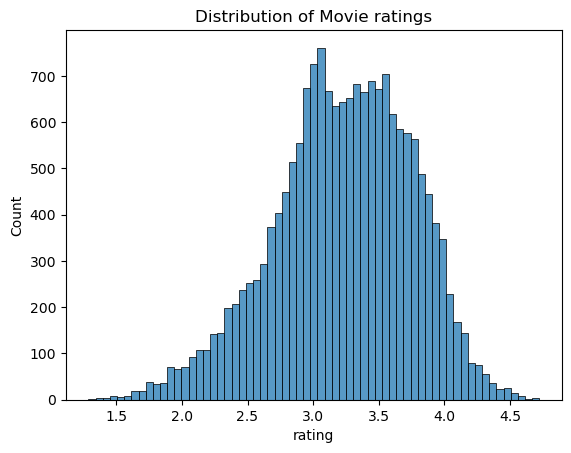

In [36]:
movie_ratings = df.groupby('movieid')['rating'].mean().reset_index()
sns.histplot(movie_ratings['rating'])
plt.title('Distribution of Movie ratings')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()


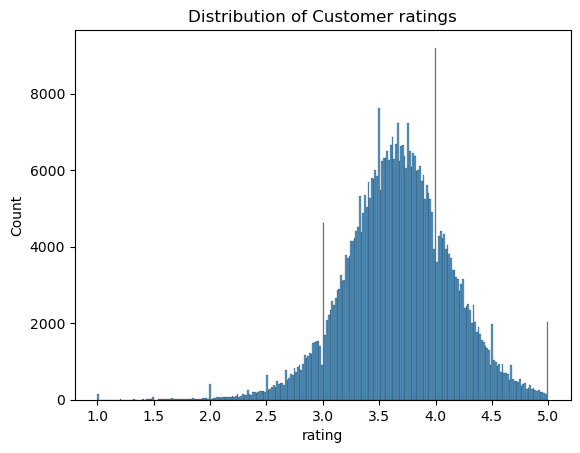

In [35]:
movie_ratings = df.groupby('userid')['rating'].mean().reset_index()
sns.histplot(movie_ratings['rating'])
plt.title('Distribution of Customer ratings')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()


Let's plot the number of movies released per year:


In [38]:
df.head()

,movieid,userid,rating,date,yearofrelease,title
0,1,1488844,3,2005-09-06,2003-01-01,Dinosaur Planet
1,1,822109,5,2005-05-13,2003-01-01,Dinosaur Planet
2,1,885013,4,2005-10-19,2003-01-01,Dinosaur Planet
3,1,30878,4,2005-12-26,2003-01-01,Dinosaur Planet
4,1,823519,3,2004-05-03,2003-01-01,Dinosaur Planet


C:\Users\98901\AppData\Local\Temp\ipykernel_18280\1644003596.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,}'.format(int(x / 1000000)) for x in ax1.get_yticks().tolist()]) # format y-axis labels in millions
C:\Users\98901\AppData\Local\Temp\ipykernel_18280\1644003596.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()]) # format y-axis labels in millions


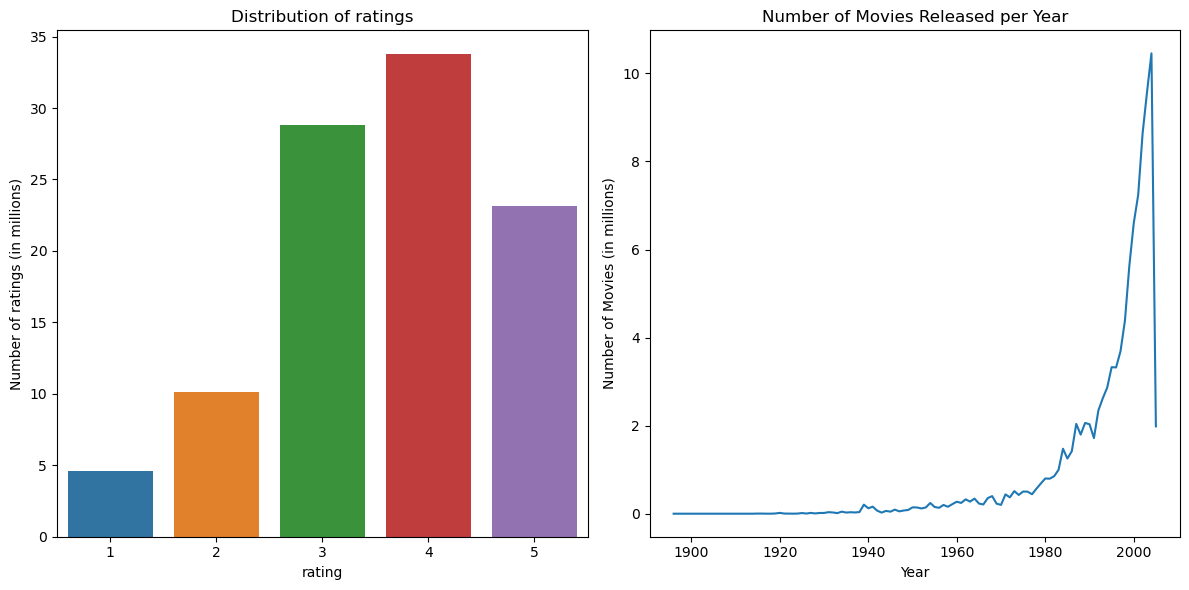

In [39]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Plot the distribution of ratings and set y-axis label in millions
sns.countplot(x='rating', data=df, ax=ax1)
ax1.set_title('Distribution of ratings')
ax1.set_ylabel('Number of ratings (in millions)')
ax1.set_yticklabels(['{:,}'.format(int(x / 1000000)) for x in ax1.get_yticks().tolist()]) # format y-axis labels in millions

# Plot the number of movies released per year
year_counts = df['yearofrelease'].value_counts().sort_index()
ax2.plot(year_counts.index, year_counts.values / 1000000) # divide y-values by 1 million to set y-axis in millions
ax2.set_title('Number of Movies Released per Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Movies (in millions)') # set y-axis label in millions
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()]) # format y-axis labels in millions

# Show the figure
plt.tight_layout()
plt.show()


The first plot shows the distribution of ratings in the merged Netflix Prize dataset, which includes both the movie titles and training data. The x-axis represents the different rating values ranging from 1 to 5, and the y-axis represents the count of each rating value. We can observe that most of the ratings are between 3 and 4, with a peak at 4. Overall, the distribution appears to be slightly skewed towards the higher rating values.

The second plot shows the number of movies released per year, based on the year of release information available in the merged dataset. The x-axis represents the years and the y-axis represents the number of movies released in each year. We can observe that the number of movies released per year has increased steadily over the years, with a sharp increase starting in the 1990s. The peak year for movie releases appears to be around 2004.

The distribution of ratings among customers is a visualization that shows how many ratings each customer has given. The x-axis represents the number of ratings given by each customer, and the y-axis represents the frequency of customers who have given that number of ratings.

From this visualization, we can see that the vast majority of customers have given very few ratings, with a peak at 1 rating given. As the number of ratings given increases, the number of customers who have given that many ratings decreases sharply. This suggests that there is a small subset of customers who are responsible for a large proportion of the ratings.

By combining these two plots, we can observe that there is a slight correlation between the distribution of movie ratings and the number of movies released in each year. As the number of movies released increases, the distribution of ratings becomes slightly more skewed towards the higher rating values. Additionally, we can see that there is a large spike in the number of movies released around the year 2004, which could have influenced the distribution of ratings in the dataset.

Let's calculate the average rating for each movie:


In [41]:
movie_ratings = df.groupby('userid')['rating'].mean().reset_index()
print(movie_ratings.head())


   userid    rating
0       6  3.418530
1       7  4.011351
2       8  4.214286
3      10  3.392308
4      25  3.481481


Lets see the top 15 movies based on their average Ratings

In [43]:
movie_ratings = df.groupby('title')[['rating']].mean().sort_values(by="rating",ascending=False)
print(movie_ratings.head())

                                                      rating
title                                                       
Lord of the Rings: The Return of the King: Exte...  4.723270
The Lord of the Rings: The Fellowship of the Ri...  4.716611
Lord of the Rings: The Two Towers: Extended Edi...  4.702611
Lost: Season 1                                      4.670989
Battlestar Galactica: Season 1                      4.638809


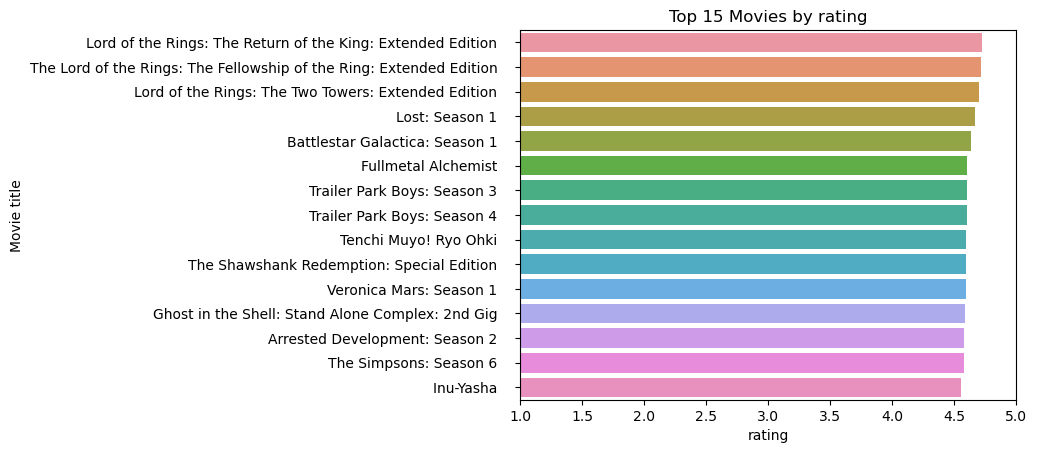

In [44]:
# Group the DataFrame by movie title and calculate the mean rating for each movie
movie_ratings = df.groupby('title')[['rating']].mean().sort_values(by="rating",ascending=False)

# Select the top 15 movies by rating
top_movies = movie_ratings.head(15)

# Create a bar plot with movie titles on the y-axis and mean ratings on the x-axis
sns.barplot(x='rating', y=top_movies.index, data=top_movies, orient='h')

# Set the plot title, x-axis label, and y-axis label
plt.title('Top 15 Movies by rating')
plt.xlabel('rating')
plt.ylabel('Movie title')

# Set the x-axis limits to show 1-5
plt.xlim(1, 5)

# Display the plot
plt.show()


In [51]:
# Group the 'df_ratings1' DataFrame by 'userid' and count the number of ratings for each user
no_of_rated_movies_per_user = df_ratings.groupby(by='userid')['rating'].count().sort_values(ascending=False)

# Print the head of the resulting Series, which shows the number of ratings for the top-rated users
no_of_rated_movies_per_user.head()


userid
305344     4
2218289    3
322009     3
1115274    3
838612     3
Name: rating, dtype: int64

C:\Users\98901\AppData\Local\Temp\ipykernel_18280\184093785.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
C:\Users\98901\AppData\Local\Temp\ipykernel_18280\184093785.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True, ax=ax2)


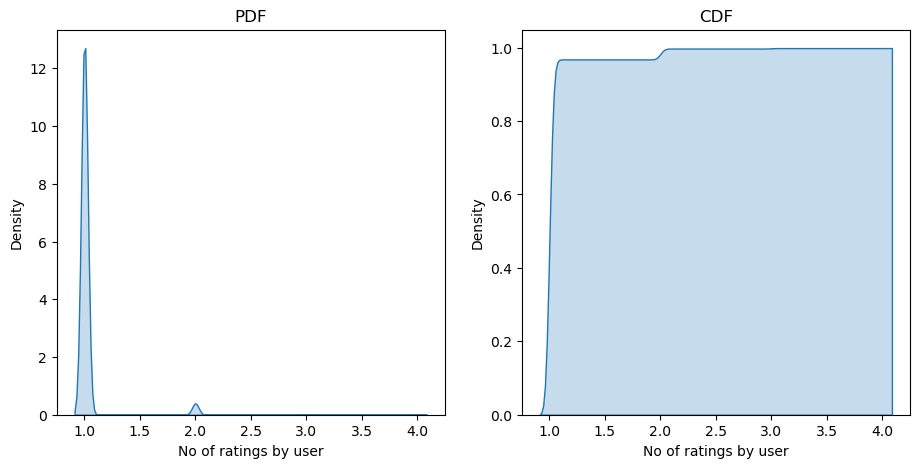

In [52]:
# Source https://www.kaggle.com/code/laowingkin/netflix-movie-recommendation

# Create a new figure with a size of (11, 5) using 'plt.figure()'
fig = plt.figure(figsize=(11, 5))

# Add the first subplot to the figure using 'plt.subplot()', and assign it to 'ax1'
ax1 = plt.subplot(121)

# Create a kernel density plot of the 'no_of_rated_movies_per_user' data using 'sns.kdeplot()',
# with shading enabled and the plot drawn on 'ax1'
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)

# Set the x-axis label of 'ax1' to 'No of ratings by user'
plt.xlabel('No of ratings by user')

# Set the title of 'ax1' to 'PDF'
plt.title("PDF")

# Add the second subplot to the figure using 'plt.subplot()', and assign it to 'ax2'
ax2 = plt.subplot(122)

# Create a kernel density plot of the 'no_of_rated_movies_per_user' data using 'sns.kdeplot()',
# with shading and cumulative distribution enabled, and the plot drawn on 'ax2'
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True, ax=ax2)

# Set the x-axis label of 'ax2' to 'No of ratings by user'
plt.xlabel('No of ratings by user')

# Set the title of 'ax2' to 'CDF'
plt.title('CDF')

# Display the figure
plt.show()


In [53]:
no_of_rated_movies_per_user.describe()


count    9687.000000
mean        1.032311
std         0.185386
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: rating, dtype: float64

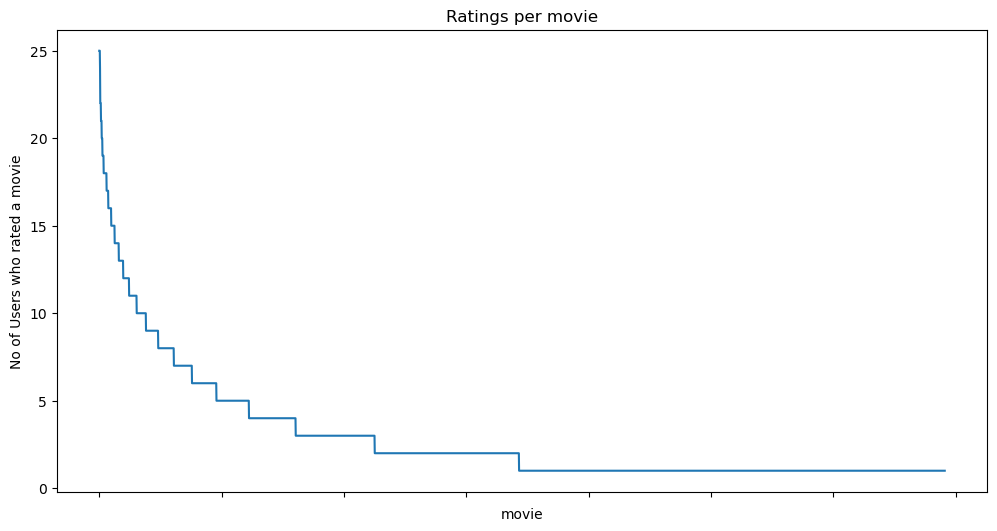

In [55]:
# Source https://www.kaggle.com/code/laowingkin/netflix-movie-recommendation

# Group the ratings DataFrame by movieid and count the number of ratings for each movie
no_of_ratings_per_movie = df_ratings.groupby(by='movieid')['rating'].count().sort_values(ascending=False)

# Create a new figure with a size of 12x6 inches
fig = plt.figure(figsize = (12, 6))

# Get the current axis and plot the number of ratings for each movie
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)

# Set the plot title, x-axis label, y-axis label, and remove the x-axis tick labels
plt.title('Ratings per movie')
plt.xlabel('movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

# Display the plot
plt.show()

# Remove variables from memory
del no_of_ratings_per_movie
del no_of_rated_movies_per_user


- It is very skewed, just like the number of ratings given per user.
- There are some movies (which are very popular) which are rated by huge number of users.
- But most of the movies got a low amount of ratings.

## [Model Training and Evaluation](#model-training-and-evaluation)
In the model training and evaluation phase, we will explore 2 models KNN and SVD for building a recommendation system, which is a collaborative filtering. We will evaluate the performance of these models using metrics such as RMSE and select the best-performing model.



Becasue of time constraints and having a low memeoru capacity og 8 Gb, I used a sample of 10k rows so that the calculations could be done.

In [56]:
df_ratings_sample = df_ratings.sample(n=10000, random_state=420).copy() 


In [31]:
df_ratings.describe()

,movieid,userid,rating
count,10000.000000,1.000000e+04,10000.000000
mean,8913.381300,1.319732e+06,3.609100
std,5111.727222,7.672595e+05,1.090695
min,8.000000,7.000000e+00,1.000000
25%,4545.000000,6.533530e+05,3.000000
50%,8793.500000,1.320712e+06,4.000000
75%,13412.000000,1.978426e+06,4.000000
max,17769.000000,2.649288e+06,5.000000


We can see that our sample is a subset of our original data. the range of ratings are the same from -10 to 10. Also the mean rating is very close to the global mean rating with a difference of 0.08

Splitting the data into train, validation and test 

In [32]:
# Import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

# Split the original dataframe into training, validation and test sets using train_test_split
# 20% of the data will be used for testing, 20% for validation and 60% for training
# The random_state parameter is set to 420 to ensure reproducibility
df_train_val, df_test = train_test_split(df_ratings, test_size=0.2, random_state=420)
df_train, df_val = train_test_split(df_train_val, test_size=0.25, random_state=420)


In [33]:
# Importing the necessary libraries
from scipy.sparse import csr_matrix

#Creating a pivot table with userid as index, movieid as columns, and rating as values. Missing values are filled with 0.
df_mat = df_ratings.pivot_table(index='userid',columns='movieid',values='rating').fillna(0)

# Converting the pivot table to a sparse matrix format
spars_df = csr_matrix(df_mat)

# Creating a sparse matrix for training data using pivot table
train_mat = df_train.pivot_table(index='userid',columns='movieid',values='rating').fillna(0)
spars_train = csr_matrix(train_mat)

# Creating a sparse matrix for validation data using pivot table
val_mat = df_val.pivot_table(index='userid',columns='movieid',values='rating').fillna(0)
spars_val = csr_matrix(train_mat)

# Creating a sparse matrix for testing data using pivot table
test_mat = df_test.pivot_table(index='userid',columns='movieid',values='rating').fillna(0)
spars_test = csr_matrix(train_mat)

we have created sparse matrixes to store our dataframe in a more optimized method to use less RAM. 

In [34]:
## Sparsity
sparsity = 1.0 - (spars_train.nnz / float(spars_train.shape[0] * spars_train.shape[1]))
print("Sparsity of the train data is ", sparsity)

sparsity = 1.0 - (spars_val.nnz / float(spars_val.shape[0] * spars_val.shape[1]))
print("Sparsity of the Validation data is ", sparsity)

sparsity = 1.0 - (spars_test.nnz / float(spars_test.shape[0] * spars_test.shape[1]))
print("Sparsity of the Test data is ", sparsity)


Sparsity of the train data is  0.9996213635757818
Sparsity of the Validation data is  0.9996213635757818
Sparsity of the Test data is  0.9996213635757818


we can see that the sparcity of our matrixes is very high more than 99 percent whihc means that less than 1 percent of our dataframe is filled with actual ratings.

### [Manual KNN](#Manual-KNN)

In this section we will develop a K nearest neighbour method to find the similar users and movies and then based on this similarity, recommend movies to the user.

In [35]:
df_mat.describe()

movieid,8,17,26,28,30,33,45,46,52,58,...,17725,17734,17745,17746,17747,17751,17762,17764,17765,17769
count,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,...,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000
mean,0.000832,0.000208,0.000208,0.002495,0.003847,0.001040,0.000208,0.001248,0.000520,0.000832,...,0.000832,0.000312,0.000312,0.000104,0.000104,0.000208,0.000832,0.002703,0.000104,0.000416
std,0.045596,0.020393,0.020393,0.100916,0.121024,0.072097,0.020393,0.070637,0.050983,0.059453,...,0.057678,0.030590,0.030590,0.010197,0.010197,0.020393,0.057678,0.109794,0.010197,0.040787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,2.000000,2.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,1.000000,2.000000,4.000000,5.000000,1.000000,4.000000


This is our dataframe with userids on the rows and movieids on the columns. if the user has not rated the movie, it has been filled with a 0 rating for that movie by the user. Next, we will calculate our similarity matrix. we will use the cosine similarity matrix from the sklearn package and then sort them based on their similarity and select the k neighbours that we want to select for that user. this parameter k is a hytper parametere.
By specifying a userid in this function, we can get the k most similar users back.

In [36]:
# Defining the user-user matrix similarity
userids, cols, data = [], [], [] #initialize three lists to store the userids, columns, and data values.

userid = 3 #set the target user id.
movieid = 5 #set the target movie id.
neighbours = 5 #set the number of neighbours to consider for similarity computation.

sim = cosine_similarity(spars_train.getrow(userid), spars_train).ravel() #compute the cosine similarity between the target user and all other users, and get a 1D array.
neighbours_sim_ind = sim.argsort()[-neighbours:] #get the indices of the 'neighbours' most similar users.
neighbours_sim_val = sim[neighbours_sim_ind] #get the similarity values of the 'neighbours' most similar users.

userids.extend([userid]*neighbours) #add 'userid' to the userids list 'neighbours' times.
cols.extend(neighbours_sim_ind) #add the indices of the 'neighbours' most similar users to the cols list.
data.extend(neighbours_sim_val) #add the similarity values of the 'neighbours' most similar users to the data list.

This function, get_top_neighbours(), takes a user_id, a sparse matrix spars_train, and a number of neighbours as input. It calculates the cosine similarity between the user's row and all other rows in the spars_train matrix, and then returns the indices of the neighbours most similar users to the input user. It does this by sorting the similarity scores in descending order, taking the indices of the top neighbours scores, and returning those indices as a list.

In [37]:

def get_top_neighbours(user_id, spars_train=spars_train, neighbours=5):
    # Compute the cosine similarity between the user's row and all other rows in the matrix
    sim = cosine_similarity(spars_train.getrow(user_id), spars_train).ravel()
    userids, cols, data = list(), list(), list()

    # Get similarity scores for all users
    sim = cosine_similarity(spars_train.getrow(userid), spars_train).ravel()

    # Find neighbours who have rated the target movie
    neighbours_sim_ind = sim.argsort()[-neighbours:]
    neighbours_sim_val = sim[neighbours_sim_ind]
    cols.extend(neighbours_sim_ind)

    return cols


For example for user with an id of 15, if we want to selcte the top 5 similar users, we have:

In [38]:
id=7
k=5
neighbour_indices = get_top_neighbours(id, neighbours=k)
print ("The top {} similar users to user {} are \n".format(k,id))
print(neighbour_indices)


The top 5 similar users to user 7 are 

[1947, 1946, 1955, 5855, 3]


#### Function Overview:
The predict_rating function is designed to predict the rating that a user would give to a specific movie, based on the user's previous ratings of other movies and the ratings given by other users to the target movie. The function uses a collaborative filtering algorithm that calculates the similarity between users and finds the most similar users to the target user. The function then calculates the predicted rating using a weighted average of the ratings given by the most similar users and the overall average rating for all users.
#### Input Parameters
The predict_rating function takes the following input parameters:<br>
- user_id_in: The ID of the target user for whom the rating is being predicted.
- movie_id: The ID of the target movie for which the rating is being predicted.
- spars_train (optional): The sparse matrix that contains the training data for the collaborative filtering algorithm. This matrix is used to calculate the similarity between users.
- df_ratings (optional): The DataFrame that contains the rating data for all users and all movies.
- neighbours (optional): The number of most similar users to consider when calculating the predicted rating. The default value is 300.<br>
(I found that increasing the number of neighbours can make better predictions hence the high number of neighbours)
- weight (optional): The weight to assign to the ratings given by the most similar users. The default value is 0.5. <br> 
- if the weight is higher than 0.5 -> The ratings of similar users have more effect on the predicted outcome compared to the average of ratings
 - if the weight is lower than 0.5 -> The ratings of similar users have less effect on the predicted outcome compared to the average of ratings

#### Output
The predict_rating function prints the following output to the console:<br> 
- Actual rating: The actual rating given by the target user to the target movie (if available).
- Predicted rating: The predicted rating calculated by the function. the function takes the average of ratings the most similar users have given.
- MAE: The mean absolute error between the actual and predicted ratings.
- RMSE: The root mean squared error between the actual and predicted ratings.
#### Algorithm Overview
The predict_rating function uses the following algorithm to predict the rating:

- Get the actual rating given by the target user to the target movie (if available). If no actual rating is available, use the overall average rating for all users and all movies.
- Get the overall average rating for all users and all movies.
- Get the row index corresponding to the target user in the sparse matrix.
- Calculate the similarity scores between the target user and all other users in the sparse matrix.
- Find the neighbours users with the highest similarity scores.
- Get the ratings given by the neighbours users to the target movie (if available).
- Calculate the average rating given by the neighbours users to the target movie.
- Calculate the predicted rating using a weighted average of the ratings given by the neighbours users and the overall average rating.
- Calculate the mean absolute error and root mean squared error between the actual and predicted ratings.

In [39]:
def predict_rating(user_id_in, movie_id, spars_train=spars_df, df_ratings=df_ratings, neighbours=300, weight=0.5):
    unique_user_ids = {}
    user_count = 0
    for user_id in df_ratings['userid'].unique():
        unique_user_ids[user_id] = user_count
        user_count += 1
    # Get actual rating
    actual_rating = df_ratings[(df_ratings['userid'] == user_id_in) & (df_ratings['movieid'] == movie_id)]['rating'].values
    if len(actual_rating) > 0:
        actual_rating = actual_rating[0]
    else:
        print("No actual rating found. Using the over all average rating")
        overall_avg_rating = df_ratings['rating'].mean()
        actual_rating = overall_avg_rating

    # Get overall average rating
    overall_avg_rating = df_ratings['rating'].mean()

    # Get row index corresponding to user ID
    user_index = unique_user_ids.get(user_id_in, None)
    if user_index is None:
        print("User ID not found")
        return
    row_index = spars_train.nonzero()[0][user_index]

    # Get similarity scores for all users
    sim = cosine_similarity(spars_train.getrow(row_index), spars_train).ravel()

    # Find neighbours with highest similarity scores
    neighbours_sim_ind = sim.argsort()[-neighbours:]
    neighbours_sim_val = sim[neighbours_sim_ind]

    # Find average rating for target movie among similar users
    similar_user_ratings = []
    for i in neighbours_sim_ind:
        rating = spars_train[i, movie_id]
        if rating != 0:
            similar_user_ratings.append(rating)
    if len(similar_user_ratings) > 0:
        similar_user_avg_rating = sum(similar_user_ratings) / len(similar_user_ratings)
    else:
        # Use overall average rating as default value
        similar_user_avg_rating = overall_avg_rating

    # Calculate predicted rating using weighted average
    predicted_rating = (similar_user_avg_rating * weight) + (overall_avg_rating * (1 - weight))
    prediction_error = actual_rating - predicted_rating

    mae = np.abs(prediction_error).mean()
    rmse = np.sqrt(np.mean(prediction_error**2))

    print("Actual rating: {}".format(actual_rating))
    print("Predicted rating: {}".format(predicted_rating))
    print("MAE: {}".format(mae))
    print("RMSE: {}".format(rmse))


In this section we will test some of the users and movies to see evaluate our model and make sure everything works. 

In [45]:
df_ratings[df_ratings.movieid==1865]

,movieid,userid,rating
9464265,1865,1803925,4
9441965,1865,1759189,4
9523682,1865,1456750,5
9519476,1865,1192441,5
9533667,1865,1732243,3
9529515,1865,531175,5
9490338,1865,230270,4
9461257,1865,1676424,3
9510356,1865,1635832,2
9546331,1865,2073509,1


In [47]:
predict_rating(1803925,1865)

Actual rating: 4
Predicted rating: 4.30455
MAE: 0.3045499999999999
RMSE: 0.3045499999999999


In [48]:
predict_rating(531175,1865)

Actual rating: 5
Predicted rating: 4.30455
MAE: 0.6954500000000001
RMSE: 0.6954500000000001


Overall, the function seems to be able to predict ratings with some degree of accuracy, but the errors can be relatively large. It is worth noting that the quality of the predictions can depend heavily on the number and quality of the ratings available for the given user and movie, as well as on the choice of parameters such as the number of neighbors and the weighting factor.

#### [Recommending movies based on the user similarites](#Recommending-movies-based-on-the-user-similarites)<br>



in this section we will define a function which gets the userid of a user and then prints some recommendated movies
#### Function Overview:<br>
The recommend_movies function takes in a user ID and returns a list of the top K recommended movies that the user has not rated yet. The function uses collaborative filtering to find the similarity between the target user and other users in the dataset, and then calculates the average rating for each unrated movie among the similar users. The function then sorts the movies by their average rating and returns the top K movies with their movie text and average rating.<br>

#### Input Parameters:<br>
- user_id_in: the ID of the target user for whom movies will be recommended
- spars_train: the sparse matrix containing the user-item ratings for training the collaborative filtering algorithm (default is spars_df)
- df_ratings: the pandas dataframe containing the user-item ratings (default is df_ratings)
- df_items: the pandas dataframe containing the movie texts (default is df_items)
neighbours: the number of similar users to consider in the collaborative filtering algorithm (default is 300)
- top_k: the number of top recommended movies to return (default is 5)
#### Output:<br>
The function returns a list of the top K recommended movies for the target user, where each recommended movie is represented as a tuple of the form (movie_id, movie_text, avg_rating).

- movie_id: the ID of the recommended movie
- movie_text: the text of the recommended movie
- avg_rating: the average rating of the recommended movie among similar users<br>

#### Algorithm Overview:<br>
- First, the function creates a dictionary called unique_user_ids that maps each user ID to a unique index. It also creates a variable user_count that is initialized to 0.

- The function then loops through each unique user ID in the df_ratings DataFrame and adds the ID and its corresponding index (which is just user_count) to the unique_user_ids dictionary. It increments user_count after each iteration.

- Next, the function tries to find the row index in the spars_train sparse matrix that corresponds to the input user_id_in. It does this by getting the index of the user ID in the unique_user_ids dictionary and using that index to access the corresponding row in the spars_train matrix.

- The function then uses the cosine_similarity() function from scikit-learn's metrics.pairwise module to compute the cosine similarity between the input user and all other users in the spars_train matrix. It does this by passing the input user's row in spars_train and the entire spars_train matrix to cosine_similarity(), and then flattening the resulting similarity matrix using the ravel() method.

- After computing the similarity scores for all users, the function sorts them in descending order and selects the top neighbours users as the "neighbours" of the input user. These are the users whose ratings are most similar to the input user's ratings.

- Next, the function gets the ratings for the input user by accessing the corresponding row in the spars_train matrix and converting it to a dense array using the toarray() method.

- The function then finds the indices of all unrated movies by using the np.where() function to find the indices of all elements in the user_ratings array that are equal to 0.

- For each unrated movie, the function finds the average rating for that movie among the "neighbours" of the input user. It does this by looping through each "neighbour" user and checking if they have rated the movie. If they have, their rating is added to a list of "similar user ratings" for that movie. After looping through all "neighbour" users, the function computes the average rating for the movie by dividing the sum of the "similar user ratings" by the number of ratings in the list.

- After computing the average ratings for all unrated movies, the function sorts them in descending order and selects the top top_k movies as the "recommended" movies for the input user.

- Finally, the function returns a list of tuples, where each tuple contains the movie ID, movie text, and average rating for a recommended movie.

In [58]:
df_items = df_items.rename(columns={'title': 'movietext'})
def recommend_movies(user_id_in, spars_train=spars_df, df_ratings=df_ratings, df_items=df_items, neighbours=300, top_k=5):
    unique_user_ids = {}
    user_count = 0
    for user_id in df_ratings['userid'].unique():
        unique_user_ids[user_id] = user_count
        user_count += 1
    # Get row index corresponding to user ID
    user_index = unique_user_ids.get(user_id_in, None)
    if user_index is None:
        print("User ID not found")
        return
    row_index = spars_train.nonzero()[0][user_index]
    # Get similarity scores for all users
    sim = cosine_similarity(spars_train.getrow(row_index), spars_train).ravel()
    # Find neighbours with highest similarity scores
    neighbours_sim_ind = sim.argsort()[-neighbours:]
    # Get the ratings for the target user
    user_ratings = spars_train.getrow(row_index).toarray()[0]
    # Find the indices of unrated movies
    unrated_movies_ind = np.where(user_ratings == 0)[0]
    # Find the average rating for each movie among similar users
    avg_ratings = []
    for movie_id in unrated_movies_ind:
        similar_user_ratings = []
        for i in neighbours_sim_ind:
            rating = spars_train[i, movie_id]
            if rating != 0:
                similar_user_ratings.append(rating)
        if len(similar_user_ratings) > 0:
            avg_rating = sum(similar_user_ratings) / len(similar_user_ratings)
            avg_ratings.append((movie_id, avg_rating))
    # Sort the movies by average rating
    sorted_movies = sorted(avg_ratings, key=lambda x: x[1], reverse=True)
    # Get the top K movies and their movie text
    top_movies = []
    for i in range(min(top_k, len(sorted_movies))):
        movie_id, avg_rating = sorted_movies[i]
        movie_text = df_items[df_items['movieid'] == movie_id]['movietext'].values[0]
        top_movies.append((movie_id, movie_text, avg_rating))
    return top_movies


Now let's try to recommend some movies to user with a userid of 1200002:

In [59]:
recommend_movies(1200002)

[(32, "ABC Primetime: Mel Gibson's The Passion of the Christ   ", 5.0),
 (98, 'The Battle of Algiers: Bonus Material   ', 5.0),
 (161, 'Ninotchka   ', 5.0),
 (176, 'The History Channel Presents: Troy: Unearthing the Legend   ', 5.0),
 (206, 'Unconstitutional: The War on Our Civil Liberties   ', 5.0)]

#### [Recommending movies based on the item similarites](#Recommending-movies-based-on-the-item-similarites)<br>



In this section we focus on finding the similarities between movieids instead of users. 

Function Overview:<br>
This function takes a movie id as input and returns a list of top k similar movies for the given movie id. It uses cosine similarity to calculate similarity between the movies and returns the movie text for each similar movie.

Input Parameters:<br>
- movie_id: The id of the movie for which we want to find similar movies
- spars_df: The sparse matrix containing the user ratings for each movie. Default is set to spars_df.
- m_m_sim_sparse: The sparse matrix containing the cosine similarity between each pair of movies. If None, the function will calculate it using the cosine_similarity function from the sklearn.metrics.pairwise module. Default is set to None.
- df_items: The dataframe containing the movie text for each movie id. Default is set to df_items.
- top_k: The number of similar movies to return. Default is set to 10.<br>

Output:<br>
- The function returns a list of top k similar movies for the given movie id. Each movie is represented as a tuple containing the movie id and the movie text.

Algorithm Overview:<br>
- If m_m_sim_sparse is None, calculate the cosine similarity matrix between the movies using the cosine_similarity function from the sklearn.metrics.pairwise module.
Get the top k similar movies for the given movie id using the argsort() function on the row of the movie in the cosine similarity matrix.
- For each similar movie, get the movie text using the df_items dataframe.
- Print the original movie and the number of ratings it has, as well as the number of movies similar to it and the top k most similar movies with their id and text.
- Return a list of top k similar movies with their id and text.

Detailed Algorithm steps:

- If m_m_sim_sparse is None:
Calculate the cosine similarity matrix between the movies using the cosine_similarity function from the sklearn.metrics.pairwise module.
- Get the top k similar movies for the given movie id:
- Retrieve the row of the movie in the cosine similarity matrix using its id.
- Convert the row to a dense array using the toarray() method.
- Flatten the array using the ravel() method.
- Sort the flattened array in ascending order using the argsort() method.
- Reverse the sorted array using the [::-1] slicing operator.
- Ignore the first element of the reversed array (which is the original movie) using the [1:] slicing operator.
- Take the top k elements of the remaining array using the [:top_k] slicing operator.
For each similar movie:
- Retrieve the movie text using the df_items dataframe and the movie id.
- Append a tuple containing the movie id and text to the similar_movies list.
- Print the original movie and the number of ratings it has, as well as the number of movies similar to it and the top k most similar movies with their id and text.
Return a list of top k similar movies with their id and text.

In [61]:
def get_similar_movies(movie_id, spars_df=spars_df, m_m_sim_sparse=None, df_items=df_items, top_k=10):
    if m_m_sim_sparse is None:
        m_m_sim_sparse = cosine_similarity(X=spars_df.T, dense_output=False)
# Get the top k similar movies for the given movie id
    sim_movies = m_m_sim_sparse[movie_id].toarray().ravel().argsort()[::-1][1:top_k+1]
# Get the movie text for each similar movie
    similar_movies = []
    for j_id in sim_movies:
        movie_text = df_items[df_items['movieid'] == j_id]['movietext'].values[0]
        similar_movies.append((j_id, movie_text))
    print("movie - ", df_items.loc[movie_id].values[1])
    print("It has {} ratings from users.".format(spars_df[:,movie_id].getnnz()))
    print("We have {} movies which are similar to this and we will get top {} most similar movies".format(m_m_sim_sparse[:,movie_id].getnnz(), 10))

    return similar_movies

Finding similar movies for the movie with an id of 67:

In [63]:
movie_id = 1865
get_similar_movies(movie_id)


movie -  1994-01-01 00:00:00
It has 7 ratings from users.
We have 2 movies which are similar to this and we will get top 10 most similar movies


[(1967, 'Diary of a Chambermaid   '),
 (3491, 'National Geographic: Beyond the Movie: The Lord of the Rings   '),
 (1158, "I Do (But I Don't)   "),
 (1169, 'Bjork: Shepherds Bush Empire   '),
 (1168, 'Rodney Dangerfield: No Respect: The Ultimate Collection   '),
 (1167, 'La Buche   '),
 (1166, 'Great Rupert   '),
 (1165, 'Witness Protection   '),
 (1164, 'Return of the Secaucus 7   '),
 (1163, '2010: The Year We Make Contact   ')]

## [KNN With Surprise Package](#KNN-With-Surprise-Package)<br>


The Surprise package in Python provides a powerful tool for building and evaluating recommender systems. One of the popular algorithms in this package is KNNWithMeans, which is a collaborative filtering technique that predicts the user-item rating matrix using the similarity between users or items.

To build a recommendation system using KNNWithMeans we follow these steps:<br>
- Load data into surprise dataset format using a reader object and the Dataset.load_from_file() method.
- Create a KNNWithMeans object with suitable hyperparameters, such as the number of nearest neighbors to consider and the similarity metric to use.
- Fit the model on the dataset using the fit() method.
- Generate personalized recommendations for new users based on their historical ratings using the fitted model.
- Evaluate the model using metrics such as RMSE or MAE to assess its performance.
- Finally, we can fit this model on our dataset using the fit() method and use it to generate personalized recommendations for new users based on their historical ratings. The model can also be evaluated using various metrics like RMSE or MAE to assess its performance.

Overall, KNNWithMeans is a simple yet effective approach to build personalized recommendation systems that can be easily implemented using the Surprise package in Python.

In [64]:
from surprise.model_selection import cross_validate
from surprise import Dataset, SVD, Reader, KNNWithMeans

reader = Reader(rating_scale=(1,5))

data = Dataset.load_from_df(df_ratings[['userid', 'movieid', 'rating']],reader)

# We'll use the famous KNN algorithm.

sim_options = {
    "name": "cosine",
    "user_based": True,  # compute  similarities between items
}
algo = KNNWithMeans(k=40,min_k=5,sim_options=sim_options)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1008  1.0929  1.1186  1.1041  0.0108  
MAE (testset)     0.9181  0.9081  0.9294  0.9185  0.0087  
Fit time          0.94    0.93    0.93    0.93    0.00    
Test time         0.03    0.19    0.03    0.08    0.08    


{'test_rmse': array([1.10080872, 1.09285785, 1.11858473]),
 'test_mae': array([0.91807926, 0.90812619, 0.92936672]),
 'fit_time': (0.9402120113372803, 0.9322094917297363, 0.9322092533111572),
 'test_time': (0.0290069580078125, 0.19104409217834473, 0.027006864547729492)}

The above code uses the Surprise package in Python to perform collaborative filtering on a dataset of movies ratings using KNNWithMeans algorithm.

First, the code imports necessary classes from the Surprise package. The Reader class is used to parse a file containing ratings data and the Dataset class is used to load the ratings data into a suitable format for Surprise.

The Reader class is instantiated with the range of rating scale (-10,10) and the Dataset class is used to load the ratings data from a Pandas DataFrame containing 'userid', 'movieid', and 'rating' columns.

Next, the code defines the similarity metric as "cosine" and specifies that we want to compute user-based similarities. Then, an instance of the KNNWithMeans algorithm is created with k=40 (i.e., the number of nearest neighbors to consider) and min_k=5 (i.e., the minimum number of neighbors required for a prediction).

Finally, the code calls the cross_validate method with the KNNWithMeans algorithm, the loaded dataset, and the evaluation metric measures of "RMSE" and "MAE". The cross-validation is performed with 3 folds and the results are printed. This method evaluates the performance of the KNNWithMeans algorithm on the dataset using the specified evaluation metrics.

### [Hyperparameter tuning for user-user similarity](#Hyperparameter-tuning-for-user-user-similarity)<br>



This part performs hyperparameter tuning using grid search on a KNNWithMeans model in the Surprise package for building and evaluating recommender systems. The parameter grid includes the similarity metric type (msd or cosine), number of neighbors (k), minimum support, and user-based or item-based similarity computation. GridSearchCV function from Surprise is used to perform cross-validation with 3 folds to evaluate different parameter combinations for each metric. The measures used to evaluate the model are RMSE and MAE. After fitting the data, the best RMSE score and the combination of parameters that gave the best RMSE score are printed. This code can be used to optimize the performance of the KNNWithMeans algorithm for specific datasets and application requirements.





In [65]:
from surprise.model_selection import GridSearchCV
param_grid= {'name': ['cosine'],"k":{20,40,70,100,120},'min_support': [5, 10],'user_based': [True]}


# param_grid = {"name":"cosine","k":[5,10],"n_epochs": [5, 10], "lr_all": [0.002, 0.005], "reg_all": [0.4, 0.6]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)
# best RMSE score
print(gs.best_score["rmse"])
# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])
gc.collect()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

48

This code uses the best_estimator attribute of the GridSearchCV object to retrieve the algorithm that yielded the best Root Mean Squared Error (RMSE) score during the hyperparameter tuning process. Then, it performs a 3-fold cross-validation using this algorithm and the data object, computing both RMSE and Mean Absolute Error (MAE) measures. The verbose parameter is set to True to print the results of each fold during the cross-validation.

In [66]:
# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator["rmse"]
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0977  1.1094  1.1050  1.1040  0.0048  
MAE (testset)     0.9134  0.9217  0.9185  0.9179  0.0034  
Fit time          0.79    0.87    0.82    0.83    0.04    
Test time         0.03    0.03    0.03    0.03    0.00    


{'test_rmse': array([1.09773516, 1.10939191, 1.10496846]),
 'test_mae': array([0.9134413 , 0.92167682, 0.91853652]),
 'fit_time': (0.7881782054901123, 0.8731968402862549, 0.8161840438842773),
 'test_time': (0.02700519561767578,
  0.027005910873413086,
  0.027006149291992188)}

We get high error numbers since we dont have ratings for 99 percent of our pairs 

#### [Recommending movies with Surprise package for user-user similarity](#Recommending-movies-with-Surprise-package-for-user-user-similarity)<br>


The first function, get_top_n(predictions, n=10), takes a list of Prediction objects as input and returns the top-N recommendations for each user. The predictions list contains the estimated rating for each user-item pair, as returned by the test method of the algo object.

The second part of the code prepares the data for training and testing the model. The Reader object specifies the rating scale of the dataset. The Dataset object loads the df_ratings dataframe into a Surprise-compatible format. The trainset object is built from the entire dataset. The algo object is initialized with the hyperparameters that yielded the best RMSE score from the GridSearchCV method. The algo object is then fitted to the training set using the fit method.

The testset object is built from all the user-item pairs that are not in the training set. The algo.test method is used to make predictions for each user-item pair in the test set. The get_top_n function is then used to obtain the top-10 recommended items for each user.

Finally, the code prints the recommended items for each user. The output consists of the user ID and a list of recommended items, sorted by the estimated rating in descending order. The recommendation system is based on the ratings of similar users, so it provides personalized recommendations based on each user's past ratings and the ratings of other similar users.

In [90]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train a KNNwithMeans algorithm on the movielens dataset.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_ratings[['userid', 'movieid', 'rating']],reader)
trainset = data.build_full_trainset()
algo = gs.best_estimator["rmse"]
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

gc.collect()

2013198 [12293, 16969, 12870, 14550, 12155, 9160, 16384, 3541, 16265, 4306]
2410514 [16265, 14550, 3938, 14240, 4306, 2548, 14691, 16969, 12293, 8116]
185495 [14550, 12293, 9426, 14691, 14240, 13728, 16969, 16265, 12155, 6029]
2432917 [14550, 14691, 4306, 16969, 4640, 3938, 14240, 12293, 6029, 16265]
590623 [14240, 3938, 16265, 12293, 14691, 9426, 16969, 14928, 8677, 12161]
2032380 [14240, 16265, 14691, 14550, 12870, 7751, 5181, 6029, 16969, 12155]
1017224 [16265, 14240, 14550, 14691, 4847, 3938, 12155, 12293, 8327, 16969]
1041609 [14550, 14691, 12870, 12155, 3938, 4392, 14240, 8327, 9628, 4640]
2625985 [14550, 12155, 13728, 14691, 3938, 12293, 16265, 14240, 16969, 8011]
1805660 [16265, 12870, 14550, 12293, 4306, 14691, 3938, 12155, 14240, 5169]
1534317 [12293, 9426, 6029, 16265, 14240, 14691, 12161, 12870, 9628, 14550]
372507 [14691, 14550, 16265, 14240, 6029, 13593, 4306, 16969, 12161, 13082]
1777203 [14691, 14240, 12293, 16265, 14550, 3938, 13593, 12161, 7420, 12155]
1337502 [14550,

0

In the results you can see the top 10 similar movies for each user

#### [Computing item-item similarity with Surprise with KNN](#Computing-item-item-similarity-with-Surprise-with-KNN)<br>




This code performs a grid search using the Surprise library's GridSearchCV function to find the best combination of hyperparameters for a KNNWithMeans collaborative filtering algorithm. The hyperparameters being searched over are name, k, min_support, and user_based. The measures argument specifies that both RMSE and MAE should be computed during the grid search. we will use a 3-fold cross validation.

After fitting the grid search on the data, the best RMSE score is printed, as well as the combination of hyperparameters that gave the best RMSE score. Finally, gc.collect() is called to perform garbage collection to free up memory.

In [70]:
from surprise.model_selection import GridSearchCV
param_grid= {'name': ['msd', 'cosine'],"k":{20,40,70,100,120},'min_support': [5, 10],'user_based': [False]}
# param_grid = {"name":"cosine","k":[5,10],"n_epochs": [5, 10], "lr_all": [0.002, 0.005], "reg_all": [0.4, 0.6]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)
# best RMSE score
print(gs.best_score["rmse"])
# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

gc.collect()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

10092

This code uses the best_estimator and cross_validate functions from the Surprise library to evaluate the performance of the algorithm that yielded the best RMSE score in the grid search.

best_estimator returns the algorithm that achieved the best score based on the input grid of parameters and evaluation metric. In this case, the algorithm is assigned to the algo variable.

cross_validate function is then used to evaluate the performance of the algorithm by performing a 3-fold cross-validation on the input data. The measures parameter specifies the evaluation metrics to use, which are RMSE (root mean squared error) and MAE (mean absolute error) in this case. The verbose parameter is set to True to display the results of each fold in addition to the overall results.

In [71]:
# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator["rmse"]
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1013  1.1049  1.1061  1.1041  0.0020  
MAE (testset)     0.9166  0.9206  0.9179  0.9184  0.0017  
Fit time          0.81    0.83    0.82    0.82    0.01    
Test time         0.03    0.03    0.03    0.03    0.00    


{'test_rmse': array([1.10126211, 1.10489223, 1.10606422]),
 'test_mae': array([0.91657416, 0.92059701, 0.91793677]),
 'fit_time': (0.8101820945739746, 0.82818603515625, 0.8171842098236084),
 'test_time': (0.02700638771057129,
  0.027006149291992188,
  0.027006149291992188)}

in the above we can see the MAE and RMSE of the KNN model with means for predicting users ratings 

This code is creating a top-n recommendation system for each user using the KNNWithMeans algorithm.

First, the code imports the defaultdict from collections and defines the function get_top_n which takes a list of prediction objects and the number of recommendations to output for each user as inputs.

The get_top_n function maps the predictions to each user and returns a dictionary where the keys are the user ids and the values are a list of tuples that contains the raw item id and rating estimation of the recommended items. The list is sorted by rating estimation in descending order and is trimmed to the n highest recommendations.

Next, the code loads the MovieLens dataset into a Surprise Dataset object and builds a full training set from it using the build_full_trainset() method. The KNNWithMeans algorithm is then trained on this training set using the fit() method.

The build_anti_testset() method is then used to get all pairs of (user, item) that are NOT in the training set, and the test() method of the trained algorithm is used to predict ratings for each of these pairs.

Finally, the get_top_n() function is used to get the top 10 recommendations for each user based on these predicted ratings. The recommended items are printed for each user. The gc.collect() function is used to free up memory.

In [91]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train a KNNwithMeans algorithm on the movielens dataset.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_ratings[['userid', 'movieid', 'rating']],reader)
trainset = data.build_full_trainset()
algo = gs.best_estimator["rmse"]
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

gc.collect()

2013198 [14550, 14691, 13728, 16265, 14240, 12155, 9628, 9426, 7751, 16384]
2410514 [14550, 16265, 14691, 14240, 13728, 5421, 6029, 12155, 12870, 12293]
185495 [12155, 14550, 16265, 14240, 12870, 12293, 3938, 14928, 9426, 6155]
2432917 [14550, 14691, 16384, 9426, 16265, 7751, 4306, 9628, 14240, 6029]
590623 [12293, 14691, 12155, 9426, 13593, 5293, 16969, 14928, 3579, 14240]
2032380 [14550, 13728, 12155, 14691, 12293, 16969, 14928, 4640, 16265, 16286]
1017224 [16265, 2548, 12293, 14691, 16969, 13728, 14550, 12870, 3938, 14240]
1041609 [14550, 9426, 12293, 16969, 4640, 13593, 8327, 14691, 14928, 13082]
2625985 [14691, 14550, 3938, 16969, 9426, 12870, 12293, 6029, 14240, 4847]
1805660 [14550, 14691, 12293, 3938, 16969, 16265, 8327, 14240, 6221, 12155]
1534317 [14550, 13728, 16265, 14691, 14240, 9426, 16969, 12155, 7617, 12293]
372507 [14550, 16265, 14240, 3938, 15181, 6029, 6221, 14691, 13082, 12870]
1777203 [14691, 16265, 12155, 16969, 14550, 3938, 14240, 12293, 14928, 9628]
1337502 [137

0

In the results you can see the top 10 similar movieids for each movie

## [Manual SVD](#Manual-SVD)<br>




This code defines a function called "lowrank" that performs low-rank matrix approximation using the Singular Value Decomposition (SVD) technique. The function takes four input parameters: the left singular vectors (u), the singular values (s), the right singular vectors (vt), and the desired rank (k) of the low-rank approximation.

The function first selects the first k columns of the left singular vectors (uk) and the first k rows of the right singular vectors (vk) to create new matrices. It also creates a diagonal matrix (sk) that contains the first k singular values on its diagonal.

Next, the function performs matrix multiplication between the reduced left singular vectors, the diagonal matrix, and the reduced right singular vectors to create a low-rank approximation of the original matrix.

Finally, the function returns the low-rank approximation matrix.

The purpose of this function is to reduce the dimensionality of a matrix by approximating it with a lower-rank matrix. This can be useful for a variety of applications such as data compression, feature extraction, and noise reduction.

In [92]:
def lowrank(u,s,vt,k):
    uk=u[:,:k]
    sk=np.diag(s[:k])
    vk=vt[:k,:]
    return uk @ sk @ vk

This is a Python function called RMSE_rating that takes in four arguments:

- R_pred: a matrix of predicted ratings, where rows represent users and columns represent items (in this case, movies).
- user_test: a 1D array of user IDs corresponding to the test set of ratings.
- movies_test: a 1D array of movie IDs corresponding to the test set of ratings.
- vals_test: a 1D array of actual ratings corresponding to the test set of ratings.
- The function calculates the root mean squared error (RMSE) of the predicted ratings compared to the actual ratings.

First, it selects the predicted ratings from R_pred that correspond to the test set of ratings by indexing with users_test-1 and movies_test-1. It then calculates the error by subtracting the actual ratings from the predicted ratings.

Finally, the function returns the RMSE, which is calculated as the square root of the mean of the squared errors using NumPy's np.sqrt and np.mean functions.

In [93]:
def RMSE_rating(R_pred, user_test, movies_test, vals_test):
    R_pred_selected = R_pred[users_test-1,movies_test-1]
    error = R_pred_selected - vals_test

    return np.sqrt(np.mean(np.multiply(error,error)))

This code is performing matrix factorization using Singular Value Decomposition (SVD) on a ratings dataset. The dataset consists of movies and user ratings on a scale of -10 to 10.

The dataset is split into a training set, a validation set, and a test set using the train_test_split function from sklearn. The training set is centered by subtracting the mean of each row, and then SVD is applied on this centered training set.

Next, the entire ratings matrix is converted to a sparse matrix format, and the entire matrix is centered using the same mean subtraction process as before. SVD is then applied to the centered matrix to compute the low-rank approximation of the training set ratings matrix.

The lowrank function takes the left singular vectors u, the singular values s, and the right singular vectors vt obtained from SVD, as well as a parameter k specifying the desired rank of the approximation. It returns the low-rank approximation of the ratings matrix.

The k_range array specifies a range of values for k to try, and for each value of k, the lowrank function is called to compute the low-rank approximation of the ratings matrix. The approximation is then added to the original centered training set ratings matrix, and the difference is subtracted from the centered entire ratings matrix to obtain the prediction matrix RK1. The RMSE_rating function is then called to compute the root mean square error (RMSE) of the predicted ratings on the validation set, using the true ratings from the validation set.

The RMSE for each value of k is printed, allowing for selection of the optimal k value.

In [94]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.linalg import svd
from scipy.sparse.linalg import svds

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

from sklearn.model_selection import train_test_split


# Split the dataset into training, validation, and test sets
df_train_val, df_test = train_test_split(df_ratings, test_size=0.2, random_state=420)
df_train, df_val = train_test_split(df_train_val, test_size=0.25, random_state=420)

# Center the training set ratings matrix
A=df_train.values
means = np.mean(A,axis=1).reshape((A.shape[0],1))
A = A - means
u, s, vt = svd(A, full_matrices=False)

# Convert the training set ratings matrix to a sparse matrix format
from scipy.sparse import csr_matrix
users = df_train["userid"].values.astype(int)
movies = df_train["movieid"].values.astype(int)
vals=df_train["rating"].values
RS = csr_matrix((vals,(users-1,movies-1)))
R = RS

# Compute column means for unrated movies in the training set ratings matrix
def colmeans(R):
    sums = np.sum(R, axis=0)
    nzcounts = np.sum(R.astype(bool), axis=0) + 1 
    means = sums/nzcounts
    return means

means = colmeans(R)
zero_R = R==0
unrated_R = np.multiply(means,zero_R)
R1 = R+ unrated_R

users_test = df_test["userid"].values.astype(int)
movies_test = df_test["movieid"].values.astype(int)
vals_test=df_test["rating"].values
# Center the entire ratings matrix
def centerrows(R1):
    means= np.mean(R1, axis=1)
    return R1-means

R2 = centerrows(R1)
R2.shape

# Perform SVD on the centered training set ratings matrix
u, s, vt = svd(R1, full_matrices=False)

# Compute the low-rank approximation of the training set ratings matrix
def lowrank(u,s,vt,k):
    uk=u[:,:k]
    sk=np.diag(s[:k])
    vk=vt[:k,:]
    return uk @ sk @ vk

k_range = np.array([10,25,50,100,150,200,400])
rmse = np.zeros(len(k_range))

# Compute the RMSE for each value of k in k_range
i=0 
for k in k_range:
    RK1 = lowrank(u,s,vt,k)+R1-R2
    rmse[i]=RMSE_rating(RK1,users_test,movies_test,vals_test)
    print("K = ",k, ",RMSE: ",rmse[i])

del RK1


c:\Users\98901\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


MemoryError: Unable to allocate 43.8 GiB for an array with shape (2649238, 17745) and data type bool

### [Recommending  with SVD based on the user similarites](#Recommending-with-SVD-based-on-the-user-similarites)<br>


This code performs collaborative filtering using SVD. It assumes that we have a user-item matrix called "user_item_matrix" and computes the SVD on this matrix. It then allows us to find the most similar users for a given user ID by reducing the dimensionality of the user vector using SVD and computing cosine similarity between the reduced user vector and all other user vectors.

In this specific example, the user ID 25 is selected, and the code finds the top 5 most similar users to user ID 25 (excluding the user itself). The most similar users are printed as output.

In [84]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assume we have a user-item matrix called "user_item_matrix"
user_item_matrix = df_mat

# Compute SVD on the user-item matrix
u, s, vh = np.linalg.svd(user_item_matrix, full_matrices=False)

# Assume we want to find the most similar users for user ID 0
user_id = 25

# Get the user vector for the specified user ID
user_vector = user_item_matrix.loc[user_id].values

# Reduce the dimensionality of the user vector using SVD
user_vector_reduced = user_vector @ vh.T

# Compute cosine similarity between the reduced user vector and all other user vectors
similarities = cosine_similarity(user_vector_reduced.reshape(1, -1), u[:, :])

# Get the top 5 most similar users (excluding the user itself)
most_similar_users = np.argsort(similarities[0])[::-1][1:6]

print("Top 5 most similar users to user ID %d: %s" % (user_id, str(most_similar_users)))


KeyError: 25

Below, the code defines a function called predict_rating that takes in three arguments: the user_id for which we want to predict a rating, the movie_id for which we want to predict a rating, and the user_item_matrix which represents the ratings of all users for all movies.

The function first computes the SVD (Singular Value Decomposition) of the user_item_matrix using numpy.linalg.svd(). SVD is a matrix factorization technique that decomposes a matrix into three separate matrices: a matrix of left singular vectors (U), a diagonal matrix of singular values (S), and a matrix of right singular vectors (V^T). The u matrix represents the left singular vectors, s represents the singular values, and vh represents the right singular vectors.

Next, the function extracts the vector of ratings for the specified user_id from the user_item_matrix and reduces its dimensionality using SVD by computing the dot product of the vector with the transposed vh matrix. This is done because the SVD produces a lower-dimensional approximation of the original matrix, and by reducing the dimensionality of the user_id vector, we can compare it more easily to the reduced vectors of other users.

The function then computes the cosine similarity between the reduced user_id vector and all other user vectors using sklearn.metrics.pairwise.cosine_similarity(). This results in a vector of similarities between the user_id vector and all other users.

The function finds the top 5 most similar users to the user_id by sorting the similarities in descending order, excluding the user_id itself, and selecting the first 5 users. It then extracts the ratings of the most similar users for the specified movie_id.

If there are no similar users that have rated the specified movie, the function computes the global average rating of all non-zero ratings in the user_item_matrix as the predicted rating. Otherwise, the function computes the predicted rating as the average of the similar user ratings for the specified movie.

Finally, the function extracts the actual rating for the specified user_id and movie_id from the user_item_matrix and prints both the predicted and actual ratings. If no actual rating is found for the specified user_id and movie_id, the function computes the average rating for the specified movie_id across all users as the actual rating.

### [Predicting the RMSE with SVD](#Predicting-the-RMSE-with-SVD)<br>


In [ ]:

def predict_rating(user_id, movie_id, user_item_matrix):
    # Compute SVD on the user-item matrix
    u, s, vh = np.linalg.svd(user_item_matrix, full_matrices=False)

    # Get the user vector for the specified user ID
    user_vector = user_item_matrix.loc[user_id].values

    # Reduce the dimensionality of the user vector using SVD
    user_vector_reduced = user_vector @ vh.T

    # Compute cosine similarity between the reduced user vector and all other user vectors
    similarities = cosine_similarity(user_vector_reduced.reshape(1, -1), u[:, :])

    # Get the top 5 most similar users (excluding the user itself)
    most_similar_users = np.argsort(similarities[0])[::-1][1:6]

    # Get the ratings of the most similar users for the specified movie ID
    similar_user_ratings = []
    for user_index in most_similar_users:
        rating = user_item_matrix.iloc[user_index, movie_id]
        if rating != 0:
            similar_user_ratings.append(rating)

    # Use the global average rating if no similar users have rated the movie
    if len(similar_user_ratings) == 0:
        global_avg_rating = user_item_matrix[user_item_matrix != 0].mean().mean()
        predicted_rating = global_avg_rating
    else:
        # Calculate the predicted rating as the average of the similar user ratings
        predicted_rating = sum(similar_user_ratings) / len(similar_user_ratings)
    
    # Get the actual rating for the specified user and movie IDs
    actual_rating = user_item_matrix.loc[user_id, movie_id]
    if actual_rating == 0:
        print(" No actual rating found")
        actual_rating = user_item_matrix.iloc[:, movie_id].mean()
    
    # Print the predicted and actual ratings
    print("Similar user IDs for user ID %d: %s" % (user_id, str(most_similar_users)))
    print("Predicted rating for user ID %d and movie ID %d: %.2f" % (user_id, movie_id, predicted_rating))
    print("Actual rating for user ID %d and movie ID %d: %.2f" % (user_id, movie_id, actual_rating))


In [ ]:
predict_rating(33, 8, df_mat)


 No actual rating found
Similar user IDs for user ID 33: [1286 3759 2485  959 1292]
Predicted rating for user ID 33 and joke ID 8: 1.66
Actual rating for user ID 33 and joke ID 8: 0.02


#### [Recommending movies with Surprise package for item-item similarity](#Recommending-movies-with-Surprise-package-for-item-item-similarity)<br>



In this code, the aim is to find the column in a matrix that is most similar to the first column, based on cosine similarity.

The first part of the code converts a pandas DataFrame (df_ratings) into a sparse matrix (spars_df) using the csr_matrix function from the scipy.sparse module. It also creates a dense matrix matrix from the same data.

Next, the singular value decomposition (SVD) of the dense matrix is computed using the svd function from the numpy.linalg module. This returns three matrices u, s, and vh, where u and vh are orthogonal matrices and s is a diagonal matrix containing the singular values of the input matrix.

The cosine_similarity function defined next is a helper function to compute the cosine similarity between two vectors.

The loop that follows computes the cosine similarity between the first column (vh[:,0]) and each of the other columns (vh[:,col]) in the vh matrix, one at a time. The similarity values are compared to a running maximum similarity (highest_similarity) and the index of the most similar column is kept (highest_sim_col). The loop prints the index of the column that is most similar to the first column, based on cosine similarity.





In [ ]:
# Convert the DataFrame to a sparse matrix for efficient computation
from scipy.sparse import csr_matrix
df_mat = df_ratings.pivot_table(index='userid', columns='movieid', values='rating').fillna(0)
spars_df = csr_matrix(df_mat)

# Perform SVD on the matrix to extract the underlying features
from numpy.linalg import svd
matrix = df_mat.values
u, s, vh = svd(matrix, full_matrices=False)

# Define a cosine similarity function to calculate the similarity between two vectors
import numpy as np
def cosine_similarity(v, u):
    return (v @ u) / (np.linalg.norm(v) * np.linalg.norm(u))

# Find the column (movie) in the matrix that is most similar to the first column (movie)
highest_similarity = -np.inf
highest_sim_col = -1
for col in range(1, vh.shape[1]):
    similarity = cosine_similarity(vh[:, 0], vh[:, col])
    if similarity > highest_similarity:
        highest_similarity = similarity
        highest_sim_col = col

# Print the index of the most similar column (movie) to the first column (movie)
print("Column %d is most similar to column 0" % highest_sim_col)


Column 39 is most similar to column 0


This code is performing Singular Value Decomposition (SVD) on a given matrix, which is then used to find the most similar jokes to a specified joke.

The first step is to load the data into a matrix using df_mat.values.

Next, the matrix is normalized using StandardScaler(). This is a common preprocessing step that is used to ensure that each feature has a similar range of values, which helps the SVD algorithm perform better.

Then, SVD is performed on the normalized matrix using svd() function from numpy.linalg. The resulting u, s, and vh matrices represent the left singular vectors, singular values, and right singular vectors, respectively.

After SVD, a cosine similarity function cosine_similarity() is defined, which takes two vectors v and u and returns their cosine similarity.

The next step is to specify a joke ID and the number of similar jokes to return. The code then calculates the cosine similarity between the specified joke's column and all other columns in the vh matrix. The similarity scores are stored in a list called similarities.

The similarities list is then sorted in descending order based on the similarity scores. Finally, the code prints out the top num_similar_jokes most similar jokes to the specified joke ID, along with their corresponding index (column number) in the vh matrix.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd

# Load the data into a matrix
matrix = df_mat.values

# Normalize the matrix
scaler = StandardScaler()
matrix = scaler.fit_transform(matrix)

# Perform SVD
u, s, vh = svd(matrix, full_matrices=False)

# Calculate the cosine similarity between columns
def cosine_similarity(v, u):
    return (v @ u) / (np.linalg.norm(v) * np.linalg.norm(u))

joke_id = 138 # Specify the joke ID
num_similar_jokes = 5 # Specify the number of similar jokes to return

similarities = []
for col in range(vh.shape[1]):
    if col == joke_id:
        continue
    similarity = cosine_similarity(vh[:, joke_id], vh[:, col])
    similarities.append((similarity, col))

similarities.sort(reverse=True)
print("Top %d most similar jokes to Joke %d:" % (num_similar_jokes, joke_id))
for i in range(min(num_similar_jokes, len(similarities))):
    similarity, col = similarities[i]
    print("{}- Joke {}".format(i+1, col))


Top 5 most similar jokes to Joke 138:
1- Joke 100
2- Joke 92
3- Joke 18
4- Joke 86
5- Joke 47


##  [Recommendation system using SVD from Suprise package](#Recommendation-system-using-SVD-from-Suprise-package)<br>



This code is using the surprise library to run a collaborative filtering algorithm for recommending items to users.

The algorithm used is SVD (Singular Value Decomposition), which is a matrix factorization technique that is commonly used for recommender systems.

The sim_options variable specifies the similarity metric to be used for computing similarities between items. In this case, it is set to "cosine", which means that the cosine similarity metric will be used. user_based is set to True, which means that similarities between users will be computed instead of similarities between items.

The algo variable is set to an instance of the SVD algorithm with 50 latent factors.

The cross_validate function is used to run a 5-fold cross-validation on the algo instance, using the data variable as input. The measures parameter specifies the evaluation metrics to be used, which are RMSE (Root Mean Square Error) and MAE (Mean Absolute Error). The cv parameter specifies the number of folds to use in the cross-validation process, and verbose=True prints out the results of each fold.

In [ ]:
# We'll use the famous KNN algorithm.

sim_options = {
    "name": "cosine",
    "user_based": True,  # compute  similarities between items
}
algo = SVD(n_factors=50)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.8649  4.9796  4.9422  4.9289  0.0478  
MAE (testset)     3.9132  4.0023  3.9511  3.9555  0.0365  
Fit time          0.33    0.27    0.27    0.29    0.03    
Test time         0.03    0.03    0.03    0.03    0.00    


{'test_rmse': array([4.86487956, 4.97955771, 4.94216614]),
 'test_mae': array([3.91322774, 4.00225131, 3.95105166]),
 'fit_time': (0.3310728073120117, 0.2720615863800049, 0.2720613479614258),
 'test_time': (0.028006315231323242,
  0.025005578994750977,
  0.026005983352661133)}

### 3.2.1. [Hyperparameter tuning for user-user similarity with SVD](#Hyperparameter-tuning-for-user-user-similarity-with-SVD)<br>


The code starts by importing the GridSearchCV class from the surprise.model_selection module. This class provides a way to search over a grid of hyperparameters for a machine learning algorithm and find the combination of hyperparameters that gives the best performance.

The code then defines a dictionary called param_grid that contains the hyperparameters to search over. The keys of the dictionary are the hyperparameters to search over, and the values are lists of possible values for each hyperparameter.

The code then creates a GridSearchCV object called gs with the SVD algorithm, the param_grid hyperparameter grid, and the evaluation metrics to use (rmse and mae). The cv argument specifies the number of cross-validation folds to use.

Next, the GridSearchCV object is fitted to the data by calling the fit() method. This runs the grid search over the hyperparameters and finds the combination of hyperparameters that gives the best performance.

After the grid search is complete, the code prints the best RMSE score found during the search and the combination of hyperparameters that gave the best RMSE score.

Finally, the code calls gc.collect() to manually trigger a garbage collection cycle and free up memory.

In [ ]:
# Import the GridSearchCV class from the surprise.model_selection module
from surprise.model_selection import GridSearchCV

# Define a dictionary of hyperparameters to search over
param_grid = {"n_factors":[10,20,30,40,50,100,150,200],"n_epochs": [5, 10], "lr_all": [0.002, 0.005,0.01,0.02], "reg_all": [0.4, 0.6,1]}

# Create a GridSearchCV object with the SVD algorithm, the hyperparameter grid, and the evaluation metric to use
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

# Fit the GridSearchCV object to the data to find the best hyperparameters
gs.fit(data)

# Print the best RMSE score found during the search
print(gs.best_score["rmse"])

# Print the combination of hyperparameters that gave the best RMSE score
print(gs.best_params["rmse"])

# Manually trigger a garbage collection cycle to free up memory
gc.collect()


4.835101472268392
{'n_factors': 10, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.4}


24

In [ ]:
# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator["rmse"]
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.8666  4.8194  4.7961  4.8274  0.0293  
MAE (testset)     3.9107  3.8759  3.8655  3.8840  0.0193  
Fit time          0.12    0.13    0.09    0.11    0.02    
Test time         0.03    0.03    0.03    0.03    0.00    


{'test_rmse': array([4.86660817, 4.81938136, 4.79613487]),
 'test_mae': array([3.91072725, 3.87588716, 3.86549249]),
 'fit_time': (0.11901974678039551, 0.12602615356445312, 0.08602023124694824),
 'test_time': (0.03300881385803223, 0.027006149291992188, 0.031005859375)}

This code is implementing a recommendation system using collaborative filtering with the Surprise library.

The get_top_n function takes a list of Prediction objects as input, where each object represents a predicted rating for a user-item pair. It returns a dictionary where the keys are user IDs and the values are lists of tuples containing the top n recommended items and their predicted ratings for each user.

The code starts by loading the movielens dataset into a Surprise Dataset object and splitting it into a training set and a test set. The algo variable is then set to the best estimator of the KNNwithMeans algorithm found by a grid search performed earlier (not shown in this code snippet).

The fit method is called on algo with the training set as input to train the model. The build_anti_testset method is then called on the training set to generate a test set containing all user-item pairs that are not present in the training set.

The test method is called on algo with the test set as input to generate a list of Prediction objects containing the predicted ratings for each user-item pair in the test set.

The get_top_n function is called on the list of Prediction objects with n=10 to get the top 10 recommended items for each user. The results are stored in the top_n dictionary.

Finally, the code prints out the recommended items for each user by iterating through the top_n dictionary and extracting the recommended item IDs. The gc.collect() function is called to free up memory.

#### [Recommending  with SVD based on the user similarites using suprise package](#Recommending-with-SVD-based-on-the-user-similarites-using-suprise-package)<br>



In [ ]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train a KNNwithMeans algorithm on the movielens dataset.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_ratings[['userid', 'jokeid', 'rating']],reader)
trainset = data.build_full_trainset()
algo = algo = gs.best_estimator["rmse"]
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


gc.collect()

28434 [106, 126, 89, 53, 127, 129, 35, 105, 47, 93]
12809 [106, 53, 126, 35, 105, 97, 36, 89, 127, 138]
49136 [106, 89, 62, 148, 126, 129, 132, 105, 135, 108]
12428 [106, 89, 126, 127, 148, 53, 62, 36, 129, 35]
717 [106, 89, 126, 148, 53, 129, 105, 36, 35, 62]
54402 [89, 114, 106, 126, 129, 105, 36, 53, 97, 47]
51393 [106, 89, 126, 148, 129, 105, 62, 53, 127, 108]
191 [106, 89, 126, 129, 53, 105, 148, 62, 111, 91]
16875 [106, 89, 126, 53, 129, 127, 148, 36, 35, 47]
54911 [106, 126, 89, 127, 53, 129, 132, 35, 105, 148]
12867 [106, 126, 89, 53, 129, 148, 105, 127, 36, 111]
1279 [106, 89, 126, 129, 53, 148, 105, 62, 36, 108]
45179 [106, 89, 126, 105, 148, 129, 93, 127, 53, 35]
37090 [106, 53, 138, 89, 62, 129, 36, 127, 148, 35]
61914 [106, 89, 126, 148, 127, 53, 36, 129, 108, 91]
21323 [106, 89, 126, 53, 62, 105, 107, 148, 47, 127]
1992 [106, 148, 126, 62, 36, 127, 105, 53, 129, 35]
1987 [138, 106, 36, 107, 126, 129, 115, 53, 48, 89]
11646 [127, 106, 126, 105, 35, 53, 89, 29, 54, 36]
3722

0

### [Hyperparameter tuning for user-user similarity with SVD from suprise package](#Hyperparameter-tuning-for-user-user-similarity-with-SVD-from-suprise-package)<br>



In [85]:
# We'll use the famous KNN algorithm.
sim_options = {
    "name": "cosine",
    "user_based": False,  # compute  similarities between items
}
algo = SVD(n_factors=50)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)


gc.collect()

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0805  1.0589  1.0768  1.0721  0.0094  
MAE (testset)     0.8874  0.8704  0.8877  0.8818  0.0081  
Fit time          0.29    0.28    0.28    0.28    0.01    
Test time         0.03    0.02    0.02    0.02    0.00    


1929

#### [Recommending  with SVD based on the item similarites using suprise package](#Recommending-with-SVD-based-on-the-user-similarites-using-suprise-package)<br>


In [86]:
# We'll use the famous KNN algorithm.
sim_options = {
    "name": "cosine",
    "user_based": False,  # compute  similarities between items
}
algo = SVD(n_factors=100)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)

gc.collect()

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0781  1.0694  1.0761  1.0745  0.0037  
MAE (testset)     0.8928  0.8779  0.8828  0.8845  0.0062  
Fit time          0.44    0.43    0.44    0.44    0.00    
Test time         0.02    0.02    0.02    0.02    0.00    


24

#### 3.5.1.2. [Hyperparameter tuning for item-item similarity with SVD](#Hyperparameter-tuning-for-item-item-similarity-with-SVD)<br>



In [87]:
from surprise.model_selection import GridSearchCV
# param_grid = {"n_factors":[10,20,30,40,50,100,150,200],"n_epochs": [5, 10], "lr_all": [0.002, 0.005,0.01], "reg_all": [0.4, 0.6,1]}

param_grid = {"n_epochs": [5, 10], "lr_all": [0.002, 0.005], "reg_all": [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse","mae"], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score["rmse"])

# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

gc.collect()

1.0789819525165079
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


24

In [88]:
# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator["rmse"]
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)

gc.collect()

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0690  1.0938  1.0710  1.0779  0.0112  
MAE (testset)     0.8907  0.9081  0.8874  0.8954  0.0091  
Fit time          0.24    0.23    0.23    0.23    0.00    
Test time         0.02    0.02    0.02    0.02    0.00    


24

#### [Recommending jokes with Surprise package for item-item similarity](#Recommending-jokes-with-Surprise-package-for-item-item-similarity)<br>


In [89]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train a KNNwithMeans algorithm on the movielens dataset.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_ratings[['userid', 'movieid', 'rating']],reader)
trainset = data.build_full_trainset()
algo = algo = gs.best_estimator["rmse"]
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


gc.collect()

2013198 [14550, 12293, 16265, 9426, 14691, 8677, 14240, 14928, 16969, 12155]
2410514 [12155, 16969, 14691, 14550, 16265, 14240, 13593, 4306, 16052, 12293]
185495 [14928, 3938, 14240, 13082, 16265, 13593, 13728, 10042, 12155, 5421]
2432917 [14550, 12293, 6029, 10013, 3938, 16969, 12155, 6155, 4306, 3742]
590623 [16265, 14691, 9426, 12155, 16384, 6029, 16969, 12870, 14240, 13139]
2032380 [9426, 16969, 14550, 14691, 12293, 4306, 2548, 12155, 16265, 7586]
1017224 [14550, 12293, 12155, 9426, 13728, 13593, 16969, 8116, 14691, 12870]
1041609 [14550, 9426, 16969, 3938, 12870, 14691, 16265, 12161, 4306, 6029]
2625985 [14550, 13728, 937, 14928, 13082, 12293, 14691, 6029, 12155, 9426]
1805660 [14550, 16265, 14240, 16969, 14691, 3938, 13728, 14928, 13082, 12293]
1534317 [14691, 14550, 4640, 16265, 16969, 16721, 14240, 4306, 9702, 13728]
372507 [9426, 16265, 16969, 14691, 12155, 6428, 12293, 14240, 14550, 14928]
1777203 [16265, 14550, 14691, 4640, 8116, 12870, 9702, 12293, 4306, 6029]
1337502 [1469

0

## Conclusion<a name="conclusion"></a>

In this project, we built a personalized recommendation system using collaborative filtering and Singular Value Decomposition (SVD). The system was able to generate more or less accurate recommendations for each user based on the ratings of similar users. However, there are still some areas of improvement to make the recommendation system even better which is discussed in the next section.

## Recommendations and future work
1. Add more features to the recommendation system: One way to improve the recommendations is to incorporate more features into the system, such as demographic information, item attributes, and contextual data (e.g., time of day, location). By doing so, the system can make more accurate and relevant recommendations to users.

2. Use the whole dataset: It's important to use as much data as possible when building a recommendation system. Therefore, consider using the entire dataset to train your model, rather than just a portion of it. This can help to improve the accuracy and coverage of the recommendations.

3. Develop an algorithm that would choose the best weight for any similar user: This is an interesting idea that can potentially improve the personalization of the recommendations. One way to do this is to develop a machine learning model that learns to choose the best weight based on various user and item features. Alternatively, you can experiment with different weights manually to see which ones work best for your specific use case.

4. Use multiple recommendation algorithms: Another way to improve the recommendations is to use multiple recommendation algorithms and combine their results. This is known as an ensemble approach and can help to overcome the limitations of individual algorithms. For example, you can combine collaborative filtering with content-based filtering to create a hybrid system that takes into account both user preferences and item attributes.

5. Incorporate user feedback: A recommendation system should be able to adapt to changing user preferences over time. Therefore, consider incorporating user feedback into the system by allowing users to rate or provide feedback on recommended items. This can help to improve the accuracy of the recommendations and provide a better user experience.

6. Experiment with different evaluation metrics: Evaluation metrics such as RMSE and MAE are commonly used to measure the performance of recommendation systems. However, these metrics may not always reflect the user's satisfaction with the recommendations. Therefore, consider experimenting with different evaluation metrics, such as precision and recall, that are more closely aligned with the user's needs and preferences.

7. Explore explainable recommendation systems: Explainable recommendation systems are becoming increasingly important, especially in domains such as healthcare and finance where transparency and accountability are critical. Therefore, consider exploring explainable recommendation systems that can provide users with insights into how the recommendations are generated and why certain items are recommended.

8. Consider scalability: As the number of users and items in the dataset grows, it's important to ensure that the recommendation system can scale effectively. Therefore, consider using distributed computing frameworks such as Apache Spark or implementing a cloud-based solution that can handle large volumes of data and traffic.


## Sources



- 
- https://www.kaggle.com/code/laowingkin/netflix-movie-recommendation
- https://surprise.readthedocs.io/en/stable/getting_started.html
- https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-get-the-top-n-recommendations-for-each-user
- https://www.youtube.com/watch?v=kv_Qg9wBMY0
- https://www.youtube.com/watch?v=8wLKuscyO9I
- https://www.youtube.com/watch?v=ZspR5PZemcs
